# Análise de Componentes Principais (PCA) com o Dataset Iris

## Introdução ao PCA

O **PCA (Principal Component Analysis)** é uma técnica de redução de dimensionalidade que transforma variáveis possivelmente correlacionadas em variáveis não correlacionadas, chamadas de componentes principais. Ele é amplamente usado para:

- **Reduzir a dimensionalidade** dos dados enquanto preserva a maior parte da variância.
- **Visualizar dados** de alta dimensionalidade em 2D ou 3D.
- **Remover correlações** entre variáveis.

Neste notebook, aplicaremos o PCA ao famoso dataset **Iris** para reduzir suas 4 dimensões originais para 2 dimensões e visualizar os resultados.

---

## Carregar o Dataset Iris

O dataset **Iris** é um conjunto de dados clássico em aprendizado de máquina que contém informações sobre 150 flores de três espécies diferentes (**setosa**, **versicolor** e **virginica**). Cada flor é descrita por 4 atributos numéricos:

1. Comprimento da sépala.
2. Largura da sépala.
3. Comprimento da pétala.
4. Largura da pétala.

Além disso, temos o rótulo da classe para cada flor, indicando a espécie.

### Estrutura dos Dados:
- **Número de amostras**: 150
- **Número de atributos (dimensões)**: 4
- **Número de classes**: 3

**O objetivo é usar o PCA para reduzir as 4 dimensões para 2, facilitando a análise visual e exploratória.**

<img src="iris.png" alt="Iris dataset" width="500"/>

(https://medium.com/@Locemarn/an%C3%A1lise-de-dados-explorat%C3%B3rios-iris-flower-dataset-611cb68fb78e)

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Carregar dataset Iris
data = load_iris()
X = data['data']  # Dados das flores (atributos)
y = data['target']  # Classes das flores

## Pré-processamento dos Dados

Antes de aplicar o PCA, é importante realizar algumas verificações e ajustes nos dados:

1. **Verificar a escala das variáveis**:
   - O PCA é sensível a magnitudes diferentes entre variáveis.
   - Caso as variáveis estejam em escalas diferentes, é necessário normalizar ou padronizar os dados.

2. **Lidar com valores ausentes**:
   - O PCA não pode lidar com valores ausentes diretamente.
   - Certifique-se de tratar esses valores antes de aplicar o PCA (ex.: substituindo-os pela média ou mediana).

Para o dataset Iris:
- **As variáveis já estão escaladas** em magnitudes similares.
- **Não há valores ausentes**, então podemos proceder diretamente para o PCA.

In [2]:
# Exibir os 5 primeiros registros
print("Atributos Originais:")
print(data['feature_names'])

df = pd.DataFrame(X, columns=data['feature_names'])
print(df.head())


Atributos Originais:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Aplicando PCA

Agora, aplicaremos o PCA para reduzir as 4 dimensões do dataset Iris para 2 dimensões. Durante o processo, verificaremos:

1. **Variância explicada por cada componente principal**:
   - Mostra a quantidade de informação (variância) retida por cada componente.
2. **Transformação dos dados**:
   - Projetamos os dados no espaço reduzido de 2 dimensões.

O PCA nos ajuda a identificar quais componentes principais capturam a maior parte da variância do dataset, reduzindo a dimensionalidade sem perder muita informação.


In [3]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 dimensões
X_pca = pca.fit_transform(X)

# Visualizar variância explicada
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância explicada total:", np.sum(pca.explained_variance_ratio_))


Variância explicada por cada componente: [0.92461872 0.05306648]
Variância explicada total: 0.977685206318795


## Visualização dos Dados Reduzidos

Depois de aplicar o PCA, podemos visualizar os dados no espaço 2D gerado pelos componentes principais. Cada ponto no gráfico representa uma flor, e sua cor indica a classe da flor:

- **Setosa** (classe 0)
- **Versicolor** (classe 1)
- **Virginica** (classe 2)

O gráfico de dispersão resultante nos permite verificar como as diferentes espécies de flores se distribuem no espaço reduzido.

### Importância dos Componentes Principais:
- O **Componente Principal 1** explica a maior parte da variância.
- O **Componente Principal 2** explica a maior parte da variância restante.

A combinação desses dois componentes nos dá uma representação bidimensional simplificada e interpretável dos dados.


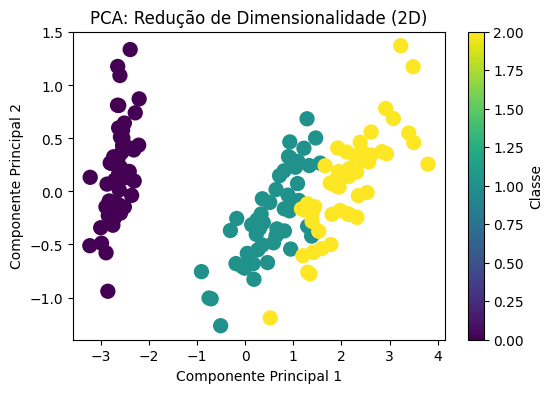

In [8]:
# Visualizar os dados transformados
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=100)
plt.colorbar(scatter, label='Classe')
plt.title("PCA: Redução de Dimensionalidade (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


## Interpretação dos Resultados

1. **Variância Explicada**:
   - Cada componente principal explica uma fração da variância total dos dados.
   - No exemplo, os dois primeiros componentes explicam a maior parte da variância, permitindo reduzir a dimensionalidade com uma perda mínima de informação.

2. **Gráfico 2D**:
   - Pontos próximos no gráfico representam flores similares com base nos atributos originais.
   - Clusters formados indicam que o PCA capturou a separação natural entre as espécies.

3. **Observações**:
   - As espécies de flores (Setosa, Versicolor, Virginica) estão parcialmente separadas, mostrando que o PCA é capaz de capturar padrões importantes dos dados.

A visualização reduzida facilita a análise exploratória e destaca as relações entre as espécies de flores.
